In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
class_names = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [4]:
# load model 
model = load_model(r'C:\Users\Honor\Documents\Projects\Plant-disease-detection\Saved_Models\file\kaggle\working\Saved_Models\4')

# check model info 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 250, 250, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 83, 83, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 83, 83, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 83, 83, 64)        3

<h1 class='alert alert-warning'>Evaluate the Model:</h1>

In [ ]:
model.evaluate(x,y)

# Test The Model

In [76]:
image1 = "../TestImages/Orange.png"
image2 = "../TestImages/Orange_citrus_greening1.png"
image3 = "../TestImages/Orange_greening.png"
image4 = "../TestImages/apple_scab.png"
image5 = "../TestImages/grape_black.jpeg"
image6 = "../TestImages/potato_late.png"
image7 = "../TestImages/early_blight_1.jpg"

In [77]:
image_to_test = image7

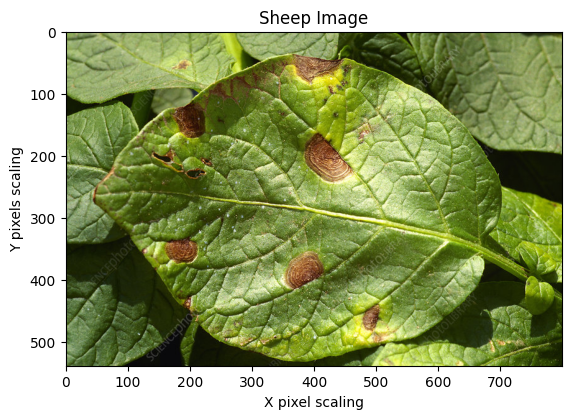

In [78]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Sheep Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread(image_to_test)
plt.imshow(image)
plt.show()

In [79]:
from keras.preprocessing import image
import numpy as np
from PIL import Image
from skimage import transform

# Dimensions of your model's expected input images
img_width, img_height = 250, 250

# Load and resize the test image
test_image = image.load_img(image_to_test, target_size=(img_width, img_height))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Print the shape of the resized image to verify
# print(test_image)

# Continue with prediction
result = model.predict(test_image, batch_size=1)
# result

1/1 [==============================] - 0s 61ms/step


Pred: Corn_(maize)___Northern_Leaf_Blight


<BarContainer object of 38 artists>

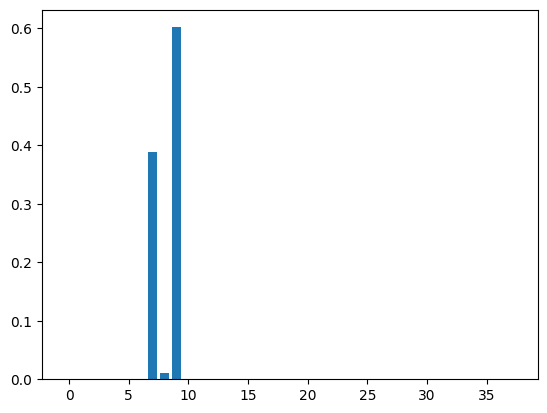

In [80]:
predictions = result
predlabel = []
prdlbl = []

for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
for i in range(len(predlabel)):
        print('Pred: '+ predlabel[i])
        
ypoints = np.array(result[0])
xpoints = np.array([i for i in range(len(ypoints))])
plt.bar(xpoints, ypoints)

In [57]:
predlabel

['Grape___Black_rot']

In [25]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)
    break

NameError: name 'validation_ds' is not defined

<Figure size 3000x3000 with 0 Axes>

<hr>

# Save the model with pd format

In [3]:
model_version = 3
model.save(f"../Saved_Models/{model_version}")

INFO:tensorflow:Assets written to: ../Saved_Models/3\assets


INFO:tensorflow:Assets written to: ../Saved_Models/3\assets


In [6]:
# from tensorflow import keras

# model_version = 2
# keras.experimental.export_saved_model(model, f'../Saved_Models/{model_version}')

AttributeError: module 'tensorflow.keras.experimental' has no attribute 'export_saved_model'

In [23]:
- 3rd year: 

SyntaxError: invalid syntax (2999926152.py, line 1)